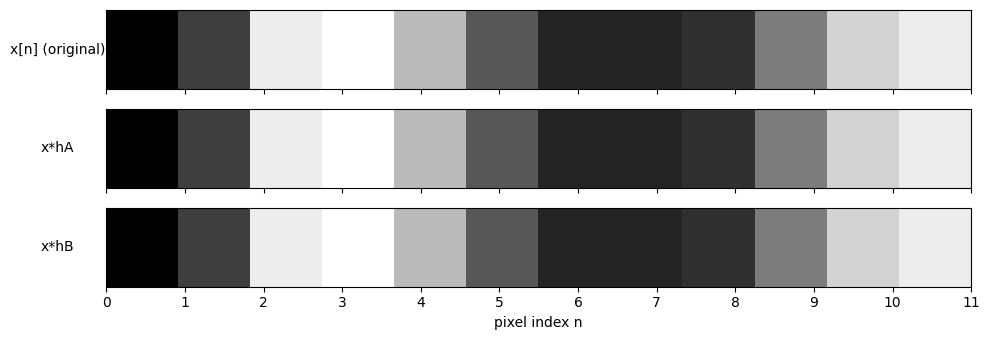

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define your image pixels here: 
x = np.array([50,100,240,255,200,
              120,80,80,90,150,220,240],
             dtype=float)

hA = (1/3)*np.array([1,1,1]) # 3-tap box blur
hB = np.array([1,-1]) # first difference (edge)

def conv_loop(x, h):
    ### Write your code for convolution using for loops here
    y = x # this is WRONG (placeholder)
    return y

yA = conv_loop(x, hA)
yB = conv_loop(x, hB)

# How do you blur twice? Repeated convolution!
## Write your code here:


# The code below is useful for plotting color strips of the signals
# ------------------------
# Helper: make color strip from a 1-D signal
# ------------------------
def strip_from_signal(sig, height=24, vmin=None, vmax=None, cmap='gray'):
    """
    Returns an array (HxW) you can imshow() as a color strip.
    By default uses grayscale; change cmap for 'viridis', etc.
    vmin/vmax allow common scaling. If None, scale per-strip.
    """
    sig = np.asarray(sig, dtype=float)
    if vmin is None: 
        vmin = sig.min()
    
    if vmax is None: 
        vmax = sig.max()
        if sig.max() != sig.min():
            vmax = sig.max()
        else:
            vmax = sig.min()+1
    # normalize to [0,1] for colormap mapping (imshow handles this)
    norm = (sig - vmin) / (vmax - vmin)
    img = np.tile(norm, (height, 1))
    return img

# Plot your outputs with x-axis (pixel index)

# Plot image strips
strips = [
    ('x[n] (original)', x),
    ('x*hA', yA),
    ('x*hB', yB),
]

# Choose a colormap:
cmap = 'gray'          

# scale each strip independently to show local contrast
independent_scale = True

plt.figure(figsize=(10, 2 + 0.5*len(strips)))
for i, (title, sig) in enumerate(strips, 1):
    if independent_scale:
        img = strip_from_signal(sig, height=24, vmin=None, vmax=None, cmap=cmap)
        vmin, vmax = None, None
    else:
        # global scaling to original x range
        vmin, vmax = x.min(), x.max()
        img = strip_from_signal(sig, height=24, vmin=vmin, vmax=vmax, cmap=cmap)
    ax = plt.subplot(len(strips), 1, i)
    im = ax.imshow(img, aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax,
                   extent=[0, len(sig)-1, 0, 1])
    ax.set_yticks([]); ax.set_ylabel(title, rotation=0, labelpad=35, va='center')
    ax.set_xticks(np.arange(0, len(sig), 1)); ax.set_xlim(0, len(sig)-1)
    if i < len(strips): ax.set_xticklabels([])
plt.xlabel('pixel index n')
plt.tight_layout()
plt.show()
